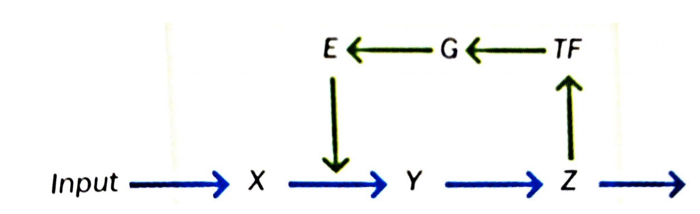

- First, I'll provide names for the arrows:
  - **a:** X→Y
  - **b:** Y→Z
  - **c:** Z→
  - **d:** Z→TF
  - **e:** TF→G
  - **f:** G→E
  - **g:** E→a

- Next, I'll write 6 equations representing this system:
  - $\frac{dX}{dt} = input - aEX$
  - $\frac{dY}{dt} = aEX - bY$
  - $\frac{dZ}{dt} = bY - cZ - dZ$
  - $\frac{dTF}{dt} = dZ - eTF$
  - $\frac{dG}{dt} = eTF - fG$
  - $\frac{dE}{dt} = fG - gE$

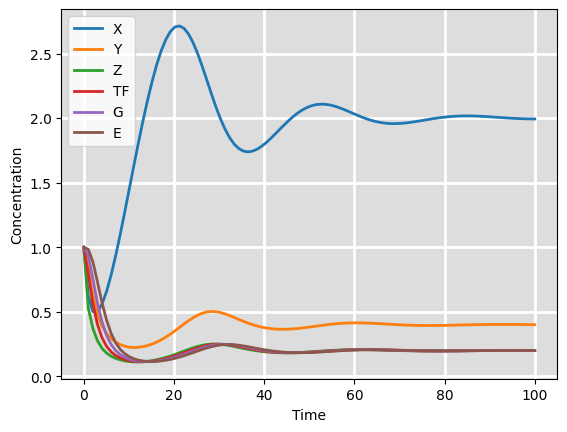

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Set initial condtions for X, Y, Z, TF, G, E
initial_conditions = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

# Set model parameters
parameters = {
    "a": 1.0,
    "b": 1.0,
    "c": 1.0,
    "d": 1.0,
    "e": 1.0,
    "f": 1.0,
    "g": 1.0,
    "m": 1.0,
    "input": 0.4}

# Time grid
t = np.linspace(0, 100, 100)

# Derivative function
def deriv(q, t, a, b, c, d, e, f, g,m, input):
    X, Y, Z, TF, G, E = q

    dXdt = input - a * E * X**m
    dYdt = a * E * X**m - b * Y**m
    dZdt = b * Y**m - c *Z**m - d * Z**m
    dTFdt = d * Z**m - e * TF
    dGdt = e * TF - f * G
    dEdt = f * G - g * E

    return dXdt, dYdt, dZdt, dTFdt, dGdt, dEdt

# Solve ODEs
solution = odeint(deriv, initial_conditions, t, args=(parameters['a'], parameters['b'], parameters['c'], parameters['d'], parameters['e'], parameters['f'], parameters['g'], parameters['m'], parameters['input']))
X, Y, Z, TF, G, E = solution.T


# Plot the results
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(facecolor='#dddddd', axisbelow=True)
ax.plot(t, X, alpha=1.0, lw=2, label='X')
ax.plot(t, Y, alpha=1.0, lw=2, label='Y')
ax.plot(t, Z, alpha=1.0, lw=2, label='Z')
ax.plot(t, TF, alpha=1.0, lw=2, label='TF')
ax.plot(t, G, alpha=1.0, lw=2, label='G')
ax.plot(t, E, alpha=1.0, lw=2, label='E')
ax.set_xlabel('Time')
ax.set_ylabel('Concentration')
ax.grid(True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
plt.show()